In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [81]:
import pandas as pd

df = pd.read_csv('ct_coord_label.csv')

df.describe()

,Unnamed: 0,label
count,1366.000000,1366.000000
mean,682.500000,0.110347
std,394.474545,0.252497
min,0.000000,-1.000000
25%,341.250000,0.000000
50%,682.500000,0.041667
75%,1023.750000,0.243021
max,1365.000000,1.000000


In [82]:
print(df.columns)
print(df['coordinates'])

Index(['Unnamed: 0', 'coordinates', 'label'], dtype='object')
0        -73.47935661,45.6677507
1        -0.13608912,51.50413561
2              -0.33986,51.54927
3               -117.228,33.9431
4            151.20797,-33.86751
                  ...           
1361    -95.35900225,29.74660701
1362      120.9181056,13.8385274
1363            -74.1545,40.8679
1364            -71.3833,41.5167
1365    -93.62040577,41.58521648
Name: coordinates, Length: 1366, dtype: object


In [83]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.columns)
# df2_negative = df[['coordinates','label']][df['label']==0]
# df2_positive = df[['coordinates','label']][df['label']==1]
df[['x','y']] = df['coordinates'].str.split(",",expand=True,)

# df2_positive[['x','y']] = df2_positive['coordinates'].str.split(",",expand=True,)

Index(['coordinates', 'label'], dtype='object')


In [84]:
# df2_negative = df2_negative[['x','y']]
# df2_positive = df2_positive[['x','y']]
# print(df2_positive.columns)
# print(df2_negative.columns)
df = df.drop(columns=['coordinates'])

In [85]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(df)

# Kmean2 = KMeans(n_clusters=3)
# Kmean2.fit(df2_positive)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

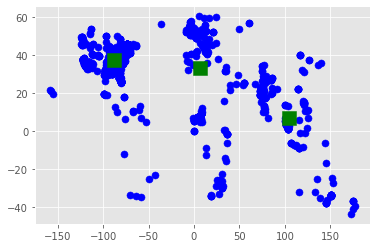

In [143]:
plt.clf()
plt.scatter(df['x'], df['y'], s =50, c='b')
for data in Kmean.cluster_centers_:
    plt.scatter(data[1],data[2], s=200, c='g', marker='s')
plt.show()

In [142]:
print("After clustering the location coordinates are:\n " + str(Kmean.cluster_centers_[0][1])+","+str(Kmean.cluster_centers_[0][2]))
print(str(Kmean.cluster_centers_[1][1])+","+str(Kmean.cluster_centers_[1][2]))
print(str(Kmean.cluster_centers_[2][1])+","+str(Kmean.cluster_centers_[2][2]))



After clustering the location coordinates are:
 6.283840270752435,33.323344248883494
-88.13399591838116,37.57657938481723
105.08146076132968,7.038626470904255


In [102]:
import numpy as np

In [112]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [114]:
from matplotlib import style
style.use('ggplot')

df.dtypes

label    float64
x         object
y         object
dtype: object

In [115]:
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

In [116]:
np_df = df.to_numpy()


In [128]:
clf = K_Means(k=3)
clf.fit(np_df)

971.7488729341526


In [129]:
print(np_df)

[[-4.86666667e-01 -7.34793566e+01  4.56677507e+01]
 [ 3.18181818e-02 -1.36089120e-01  5.15041356e+01]
 [ 1.78571429e-02 -3.39860000e-01  5.15492700e+01]
 ...
 [ 2.50000000e-01 -7.41545000e+01  4.08679000e+01]
 [ 0.00000000e+00 -7.13833000e+01  4.15167000e+01]
 [ 1.99166667e-01 -9.36204058e+01  4.15852165e+01]]


The clusters are:
-88.07538666323342 , 37.49764377501956
65.68400605752973 , 5.886464304583339
1.2076481998859323 , 49.80074005346006


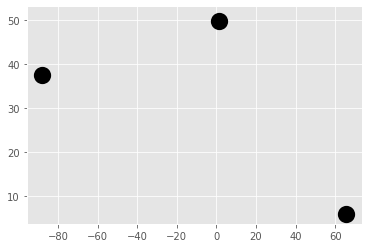

In [147]:
plt.clf()
print("The clusters are:")
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][1], clf.centroids[centroid][2],
                marker="o", color="k", s=150, linewidths=5)
    print(str(clf.centroids[centroid][1])+" , "+str(clf.centroids[centroid][2]))